## Basic Concepts of LangGraph

- **Graph**: The complete workflow structure
- **State**: Data Shared across the workflow
- **Nodes**: Steps that modify the workflow
- **Edges**: connections between nodes

In [13]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

class InputState(TypedDict):
    input_string: str
    numeric_value: int

def modify_state(input: InputState):
    print(f"current state: {input}")
    return input

graph = StateGraph(InputState)

graph.add_node("branch_a", modify_state)
graph.add_node("branch_b", modify_state)
graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_b", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()

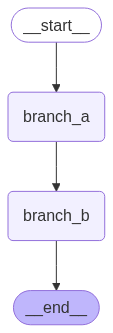

In [14]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        runnable.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [18]:
runnable.invoke({"input_string": "a"})

current state: {'input_string': 'a'}
current state: {'input_string': 'a'}


{'input_string': 'a'}

In [21]:
runnable.invoke({"input_string": "a", "numeric_value": 1})

current state: {'input_string': 'a', 'numeric_value': 1}
current state: {'input_string': 'a', 'numeric_value': 1}


{'input_string': 'a', 'numeric_value': 1}

In [22]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

class InputState(TypedDict):
    input_string: str
    numeric_value: int

def modify_state(input: InputState):
    input["input_string"] += "a"
    input["numeric_value"] += 1
    print(f"current state: {input}")
    return input


graph1 = StateGraph(InputState)

graph1.add_node("branch_a", modify_state)
graph1.add_node("branch_b", modify_state)
graph1.add_edge("branch_a", "branch_b")
graph1.add_edge("branch_b", END)

graph1.set_entry_point("branch_a")

runnable1 = graph1.compile()

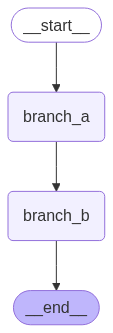

In [23]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod


display(
    Image(
        runnable1.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [25]:
runnable1.invoke({"input_string": "a", "numeric_value": 1})

current state: {'input_string': 'aa', 'numeric_value': 2}
current state: {'input_string': 'aaa', 'numeric_value': 3}


{'input_string': 'aaa', 'numeric_value': 3}

In [26]:
try:
    runnable1.invoke({"input_string": "a"})
except KeyError as e:
    print(e)

'numeric_value'
